In [1]:
pip install pygsp

     |████████████████████████████████| 1.8 MB 620 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
import networkx as nx
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pygsp import graphs, filters
from pygsp import plotting
import matplotlib.pylab as plt

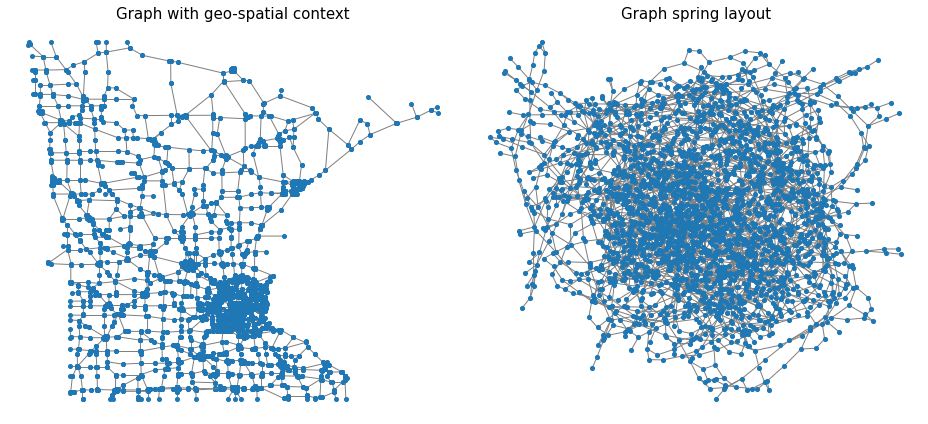

In [16]:
G = graphs.Minnesota()
G.compute_fourier_basis() # caching fourier basis

# plotting code
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
plottingparam = dict(backend='matplotlib')
nx_plotting_param = dict(node_color='#1f77b4', node_size=10, with_labels=False
             , alpha=1, linewidths=2
             , edge_color='Gray')
plotting.plot(G,ax = axes[0],**plottingparam)
_ = axes[0].set_title('Graph with geo-spatial context',fontsize=15)
axes[0].set_axis_off()
G_nx = nx.Graph([tuple(r) for r in np.array(G.get_edge_list()[:2]).T])
nx.draw_networkx(G_nx,ax =axes[1], **nx_plotting_param)
_ = axes[1].set_title('Graph spring layout',fontsize=15)
axes[1].set_axis_off()
fig.tight_layout()
plt.show()

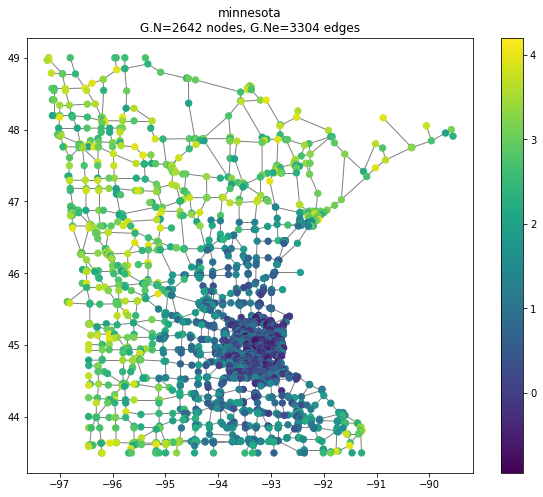

In [17]:
rs = np.random.RandomState()
N= 2642 # Total number of nodes
s = np.zeros(G.N)
s += np.sqrt(np.sum((G.coords - np.array([-93.2, 45]))**2, axis=1))
s[s>2] = 3
s += rs.uniform(-1,1, size=G.N)

# plotting code
fig = plt.figure(figsize= (10,8))
plt.style.use('seaborn-deep')
ax = fig.gca()
plotting.plot_signal(G,s,ax=ax,**plottingparam)
plt.show()


In [18]:
# First design filter as a heat fi
g = filters.Heat(G, tau=50)

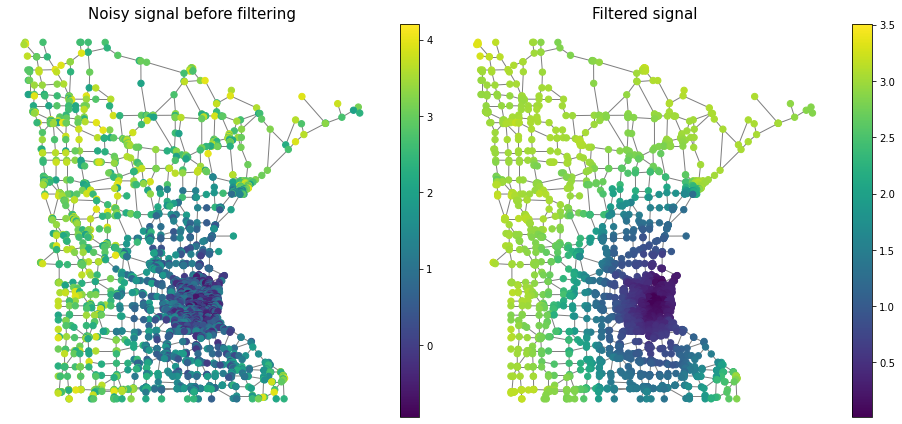

In [19]:
s_out = g.filter(s, method='exact') # exact uses GFT. Chebychev is also available

# plotting code
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0]
plotting.plot_signal(G, s, ax=axes[0], **plottingparam)
_ = axes[0].set_title('Noisy signal before filtering',fontsize=15)
axes[0].set_axis_off()
plotting.plot_signal(G, s_out, ax=axes[1], **plottingparam)
_ = axes[1].set_title('Filtered signal',fontsize=15)
axes[1].set_axis_off()
plt.style.use('seaborn-deep')
fig.tight_layout()
plt.show()

In [20]:
g = filters.MexicanHat(G, Nf=2642, lpfactor=100)


In [21]:
s_out = g.filter(s, method='exact') # exact uses GFT. Chebychev is also available

In [22]:
s_out

array([[ 1.32928882e+00,  1.35356271e-01,  1.35620242e-01, ...,
        -2.85696086e-02, -2.85750095e-02, -2.85802415e-02],
       [ 1.33669775e+00,  4.76722988e-02,  4.77249875e-02, ...,
        -7.33012126e-03, -7.26425091e-03, -7.19864357e-03],
       [ 1.37437788e+00, -1.90841234e-02, -1.91238903e-02, ...,
        -9.43889292e-02, -9.43184786e-02, -9.42478508e-02],
       ...,
       [ 6.33608383e-01,  1.00176204e-01,  1.00349548e-01, ...,
         1.62957218e-02,  1.62782870e-02,  1.62608300e-02],
       [ 6.33608383e-01,  1.00365765e-01,  1.00542988e-01, ...,
         3.98012713e-02,  3.97156108e-02,  3.96301291e-02],
       [ 6.16888577e-01, -3.12499359e-06,  6.04178199e-05, ...,
         1.51907943e-01,  1.51698353e-01,  1.51488878e-01]])

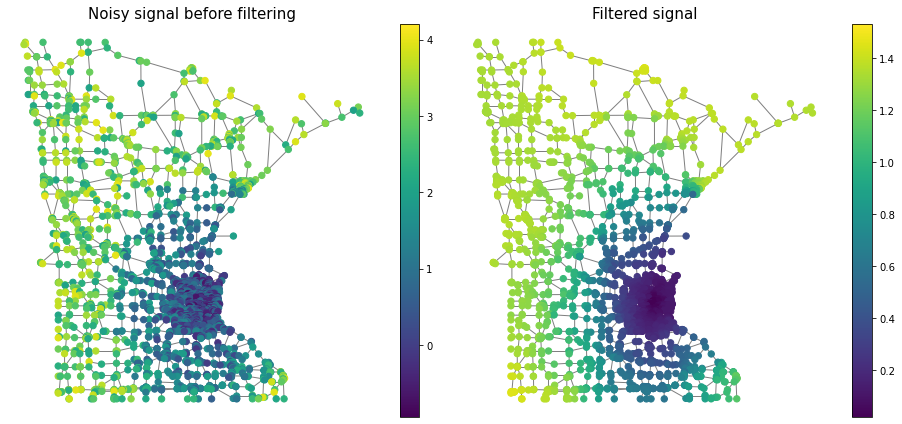

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0]
plotting.plot_signal(G, s, ax=axes[0], **plottingparam)
_ = axes[0].set_title('Noisy signal before filtering',fontsize=15)
axes[0].set_axis_off()
plotting.plot_signal(G, s_out[:,0], ax=axes[1], **plottingparam)
_ = axes[1].set_title('Filtered signal',fontsize=15)
axes[1].set_axis_off()
fig.tight_layout()
plt.style.use('seaborn-deep')
plt.show()

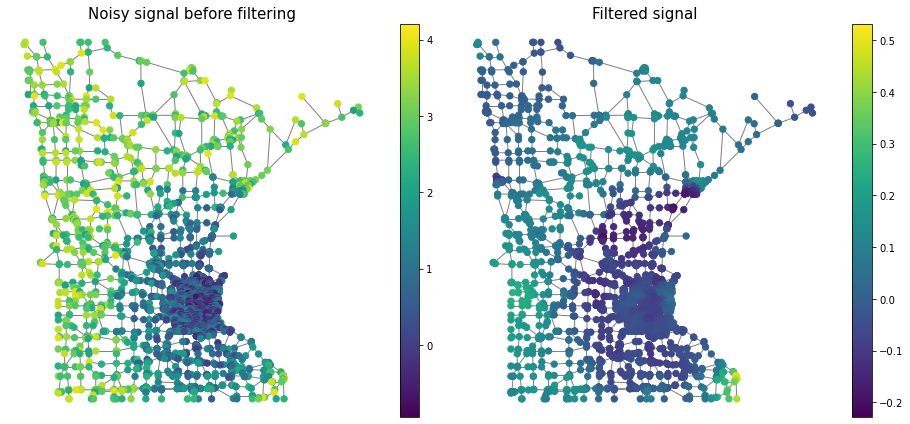

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0]
plotting.plot_signal(G, s, ax=axes[0], **plottingparam)
_ = axes[0].set_title('Noisy signal before filtering',fontsize=15)
axes[0].set_axis_off()
plotting.plot_signal(G, s_out[:,1], ax=axes[1], **plottingparam)
_ = axes[1].set_title('Filtered signal',fontsize=15)
axes[1].set_axis_off()
fig.tight_layout()
plt.style.use('seaborn-deep')
plt.show()

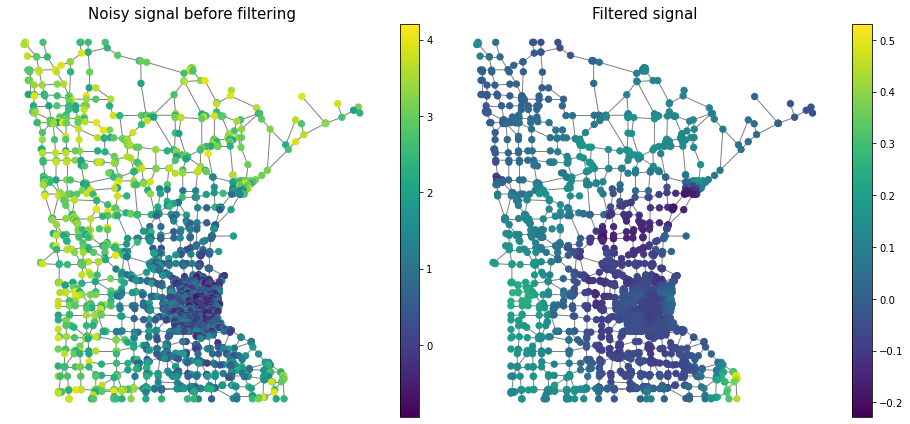

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0]
plotting.plot_signal(G, s, ax=axes[0], **plottingparam)
_ = axes[0].set_title('Noisy signal before filtering',fontsize=15)
axes[0].set_axis_off()
plotting.plot_signal(G, s_out[:,2], ax=axes[1], **plottingparam)
_ = axes[1].set_title('Filtered signal',fontsize=15)
axes[1].set_axis_off()
plt.style.use('seaborn-deep')
fig.tight_layout()
plt.show()

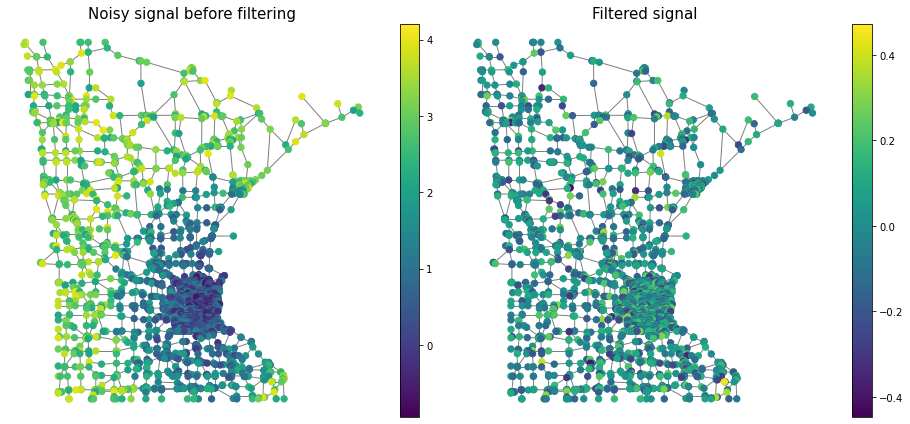

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0]
plotting.plot_signal(G, s, ax=axes[0], **plottingparam)
_ = axes[0].set_title('Noisy signal before filtering',fontsize=15)
axes[0].set_axis_off()
plotting.plot_signal(G, s_out[:,2639], ax=axes[1], **plottingparam)
_ = axes[1].set_title('Filtered signal',fontsize=15)
axes[1].set_axis_off()
plt.style.use('seaborn-deep')
fig.tight_layout()
plt.show()

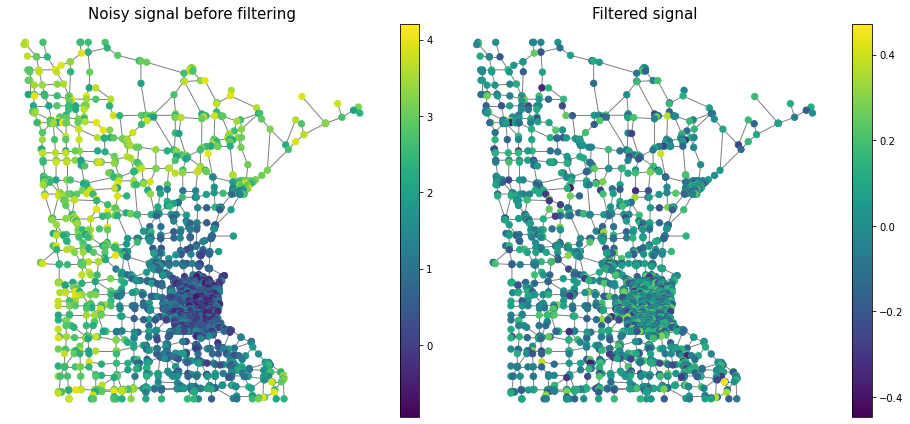

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0]
plotting.plot_signal(G, s, ax=axes[0], **plottingparam)
_ = axes[0].set_title('Noisy signal before filtering',fontsize=15)
axes[0].set_axis_off()
plotting.plot_signal(G, s_out[:,2640], ax=axes[1], **plottingparam)
_ = axes[1].set_title('Filtered signal',fontsize=15)
axes[1].set_axis_off()
fig.tight_layout()
plt.style.use('seaborn-deep')
plt.show()

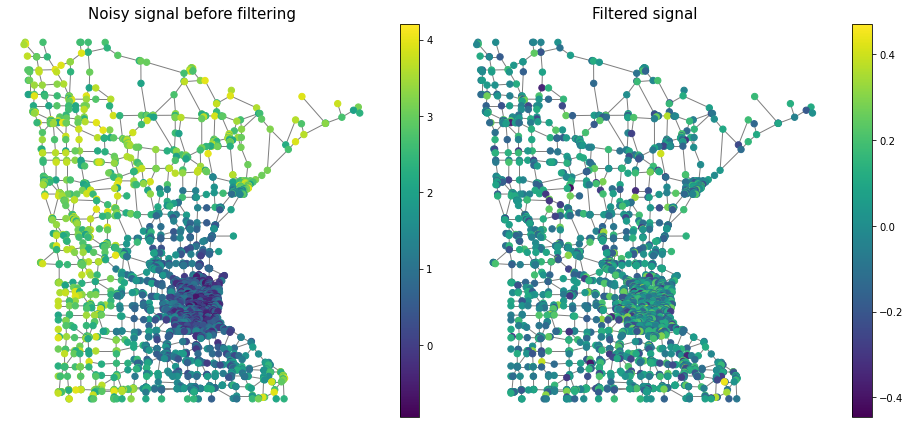

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0]
plotting.plot_signal(G, s, ax=axes[0], **plottingparam)
_ = axes[0].set_title('Noisy signal before filtering',fontsize=15)
axes[0].set_axis_off()
plotting.plot_signal(G, s_out[:,2641], ax=axes[1], **plottingparam)
_ = axes[1].set_title('Filtered signal',fontsize=15)
axes[1].set_axis_off()
fig.tight_layout()
plt.style.use('seaborn-deep')
plt.show()